In [1]:
from modecoupling import Modecoupling
import numpy as np
import matplotlib.pyplot as plt
import time

plt.rcParams['figure.figsize'] = [10, 5]

In [2]:
mode = Modecoupling()
ells1 = np.arange(1, 10000, 1)
ells2 = ells1
t0 = time.time()
M = mode.components(ells1, ells2, Nchi=100)
t1 = time.time()

total = t1-t0
print(total)

26.017860174179077


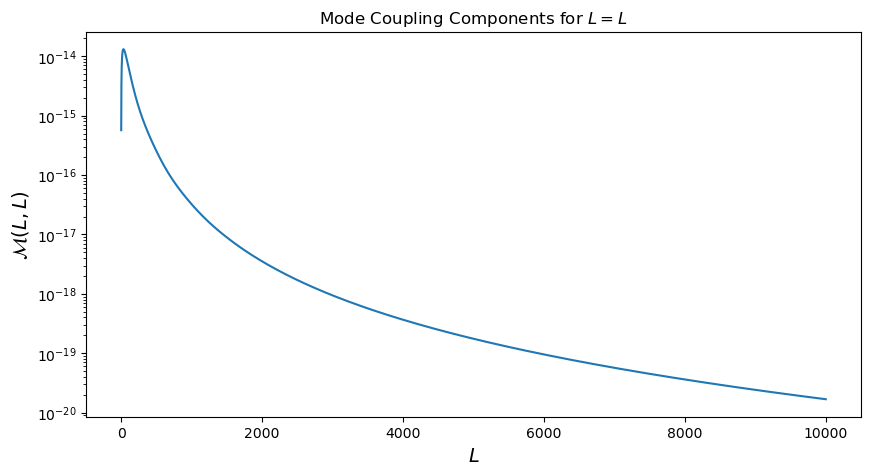

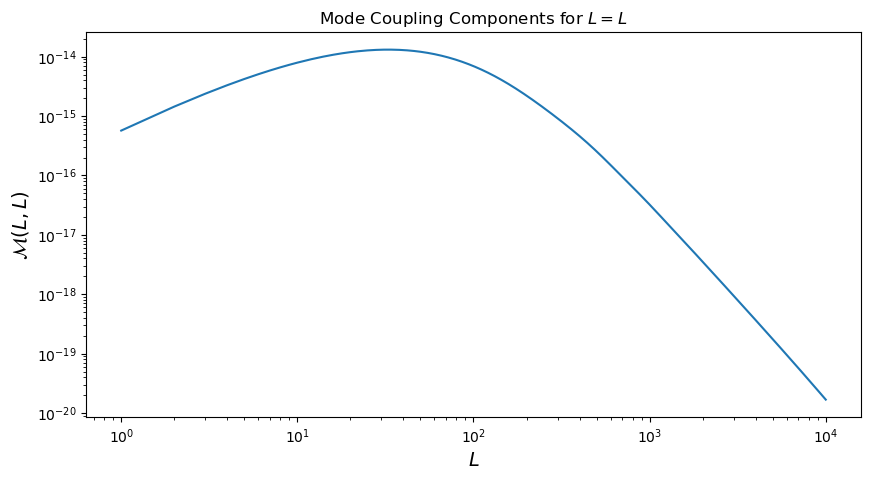

In [3]:
plt.figure()
plt.semilogy(ells1, M)
plt.title("Mode Coupling Components for $L=L$")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$\mathcal{M}(L,L)$", fontsize=14)

plt.figure()
plt.loglog(ells1, M)
plt.title("Mode Coupling Components for $L=L$")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$\mathcal{M}(L,L)$", fontsize=14)

plt.show()

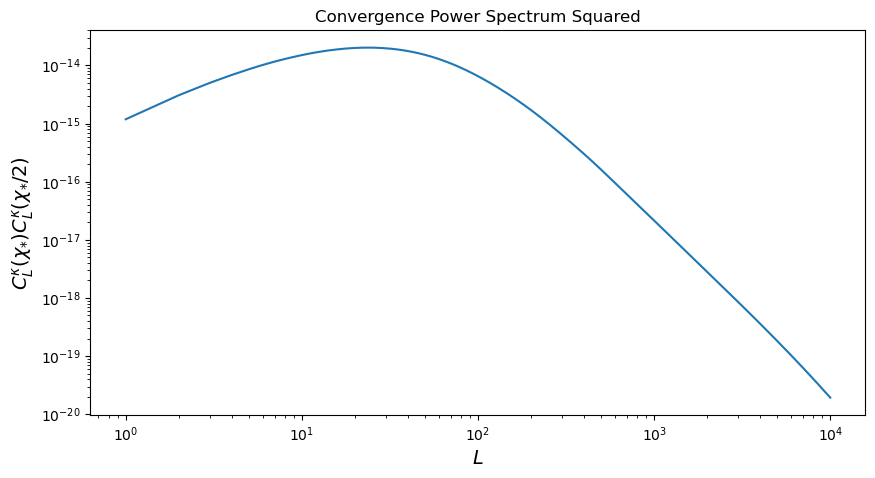

In [4]:
from powerspectra import Powerspectra
from cosmology import Cosmology
power = Powerspectra()
cosmo = Cosmology()
ells = np.arange(1, 10000, 1)
Chi_str = cosmo.get_chi_star()
Cl_kappa1 = power.get_kappa_ps_2source(ells, Chi_str, Chi_str)
Cl_kappa2 = power.get_kappa_ps_2source(ells, Chi_str/2, Chi_str/2)

plt.figure()
plt.loglog(ells, Cl_kappa1*Cl_kappa2, label="2source")
plt.title("Convergence Power Spectrum Squared")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$C_L^{\kappa}(\chi _{*})C_L^{\kappa}(\chi _{*}/2)$", fontsize=14)
plt.show()

In [5]:
from bispectra import Bispectra

bi = Bispectra()
ells3 = ells1
t0 = time.time()
conv_bi_equi = bi.get_bispectrum("kkk", ells1, ells2, ells3)
t1 = time.time()

total = t1-t0
print(total)

128.94898104667664


In [6]:
conv_bi_folded = bi.get_bispectrum("kkk", ells1, ells2/2, ells3/2)

In [7]:
ells_100 = np.ones(np.size(ells1))*100
conv_bi_100 = bi.get_bispectrum("kkk", ells_100, ells2, ells3)

In [8]:
conv_bi_100_plus100 = bi.get_bispectrum("kkk", ells_100, ells2, ells3 + 100)

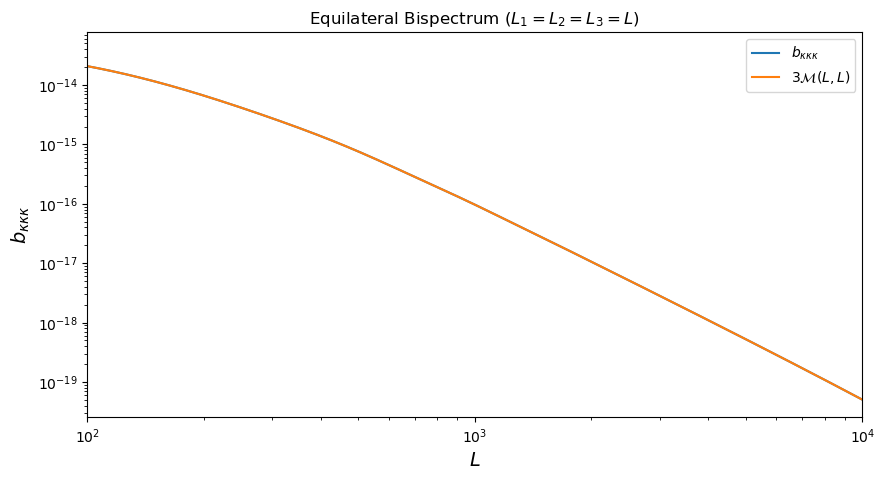

In [9]:
plt.figure()
plt.loglog(ells1, conv_bi_equi, label="$b_{\kappa\kappa\kappa}$")
plt.loglog(ells1, 3*M, label="$3\mathcal{M}(L,L)$")
plt.title("Equilateral Bispectrum ($L_1=L_2=L_3=L$)")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$b_{\kappa\kappa\kappa}$", fontsize=14)
plt.xlim(1e2, 1e4)
plt.legend()
plt.show()

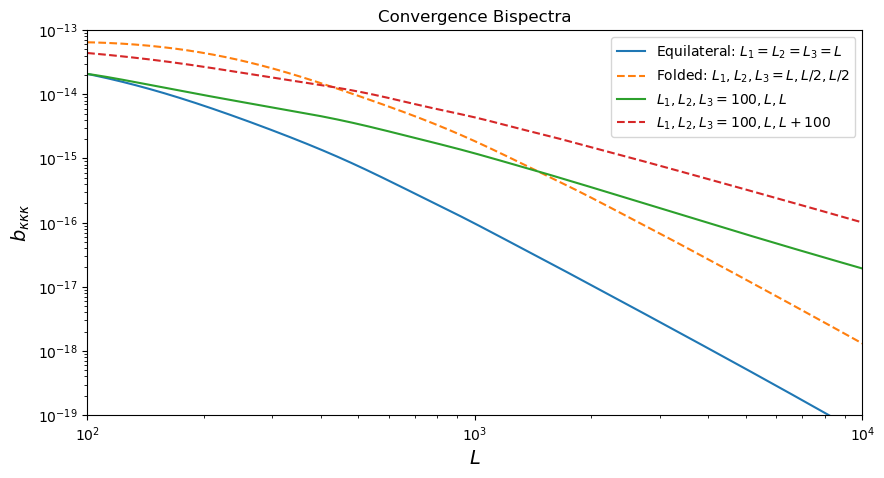

In [10]:
plt.figure()
plt.loglog(ells1, conv_bi_equi, label="Equilateral: $L_1=L_2=L_3=L$")
plt.loglog(ells1, np.abs(conv_bi_folded), label="Folded: $L_1,L_2,L_3=L,L/2,L/2$", linestyle="--")
plt.loglog(ells1, conv_bi_100, label="$L_1,L_2,L_3=100,L,L$")
plt.loglog(ells1, np.abs(conv_bi_100_plus100), label="$L_1,L_2,L_3=100,L,L+100$", linestyle="--")
plt.title("Convergence Bispectra")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$b_{\kappa\kappa\kappa}$", fontsize=14)
plt.xlim(1e2, 1e4)
plt.ylim(1e-19, 1e-13)
plt.legend()
plt.show()

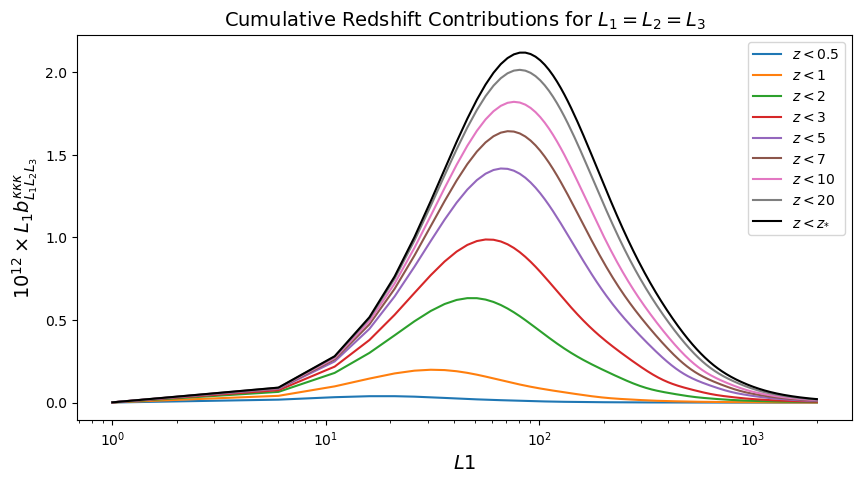

In [11]:
zmaxs = np.array([0.5,1,2,3,5,7,10,20,None])
L2max = 2000
dL = 5
Ls = np.arange(1, L2max, dL)
L1 = Ls
L2 = L3 = Ls
bi = Bispectra()
for zmax in zmaxs:
    bi_conv = bi.get_bispectrum("kkk", L1, L2, L3, zmax=zmax)
    if zmax is None:
        plt.semilogx(L1, 1e12*L1*(bi_conv), label="$z < z_{*}$", color="k")
    else:
        plt.semilogx(L1, 1e12*L1*(bi_conv), label=f"$z < ${zmax}")
plt.legend()
plt.title("Cumulative Redshift Contributions for $L_1 = L_2 = L_3$", fontsize=14)
plt.ylabel(r"$10^{12}\times L_1b_{L_1L_2L_3}^{\kappa\kappa\kappa}$", fontsize=14)
plt.xlabel("$L1$", fontsize=14)
plt.show()

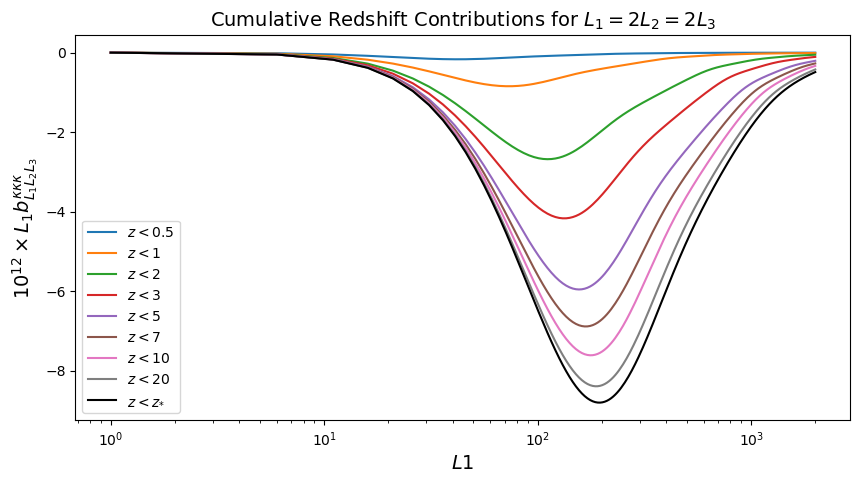

In [12]:
zmaxs = np.array([0.5,1,2,3,5,7,10,20,None])
L2max = 2000
dL = 5
Ls = np.arange(1, L2max, dL)
L1 = Ls
L2 = L3 = Ls/2
bi = Bispectra()
for zmax in zmaxs:
    bi_conv = bi.get_bispectrum("kkk", L1, L2, L3, zmax=zmax)
    if zmax is None:
        plt.semilogx(L1, 1e12*L1*bi_conv, label="$z < z_{*}$", color="k")
    else:
        plt.semilogx(L1, 1e12*L1*bi_conv, label=f"$z < ${zmax}")
plt.legend()
plt.title("Cumulative Redshift Contributions for $L_1 = 2L_2 = 2L_3$", fontsize=14)
plt.ylabel(r"$10^{12}\times L_1b_{L_1L_2L_3}^{\kappa\kappa\kappa}$", fontsize=14)
plt.xlabel("$L1$", fontsize=14)
plt.show()

/Users/mr671/Documents/repos/omegaQE/kkomega/bispectra.py:41: RuntimeWarning: invalid value encountered in sqrt
  return 2 * np.sqrt(s*(s-mag1)*(s-mag2)*(s-mag3))


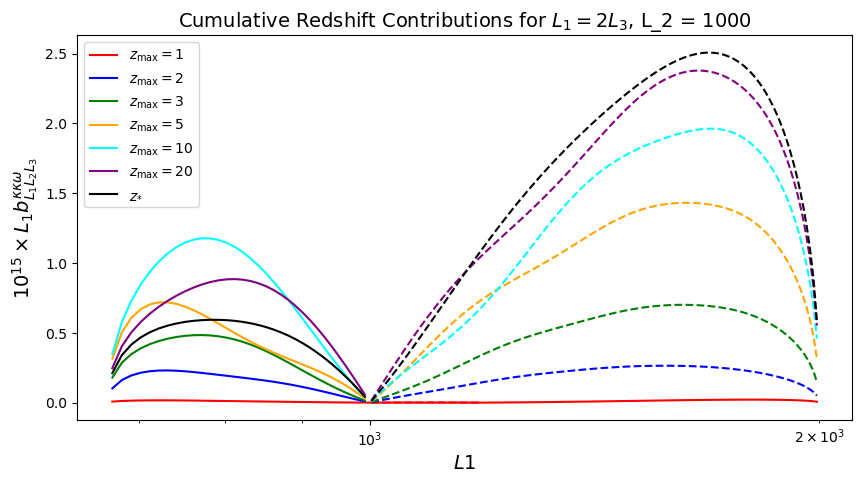

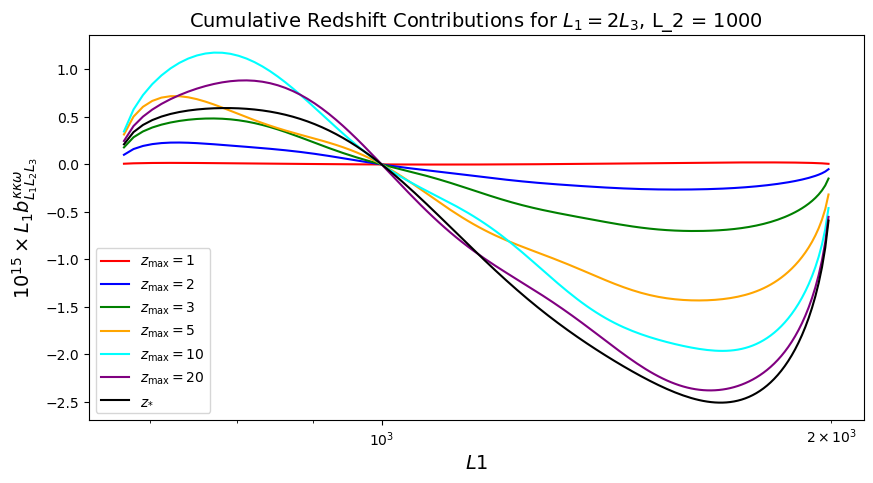

In [13]:
zmaxs = np.array([1,2,3,5,10,20,None])
colours = np.array(["red", "blue", "green", "orange","cyan","purple","k"])
L2max = 1000
dL = 5
Ls = np.arange(1, L2max, dL)
L1 = 2*Ls
L2 = 1000
L3 = Ls
bi = Bispectra()
for iii, zmax in enumerate(zmaxs):
    bi_conv_rot = bi.get_bispectrum("kkw", L1, L2, L3, zmax=zmax)
    if zmax is None:
        plt.semilogx(L1[bi_conv_rot>0], 1e15*L1[bi_conv_rot>0]*np.abs(bi_conv_rot[bi_conv_rot>0]), label="$z_{*}$", color=colours[iii])
        plt.semilogx(L1[bi_conv_rot<=0], 1e15*L1[bi_conv_rot<=0]*np.abs(bi_conv_rot[bi_conv_rot<=0]), color=colours[iii], linestyle="--")
    else:
        plt.semilogx(L1[bi_conv_rot>0], 1e15*L1[bi_conv_rot>0]*np.abs(bi_conv_rot[bi_conv_rot>0]), label=f"$z_{{\mathrm{{max}}}}=${zmax}", color=colours[iii])
        plt.semilogx(L1[bi_conv_rot<=0], 1e15*L1[bi_conv_rot<=0]*np.abs(bi_conv_rot[bi_conv_rot<=0]), color=colours[iii], linestyle="--")
plt.legend()
plt.title("Cumulative Redshift Contributions for $L_1 = 2L_3$, L_2 = 1000", fontsize=14)
plt.ylabel(r"$10^{15}\times L_1b_{L_1L_2L_3}^{\kappa\kappa\omega}$", fontsize=14)
plt.xlabel("$L1$", fontsize=14)
plt.figure()
for iii, zmax in enumerate(zmaxs):
    bi_conv_rot = bi.get_bispectrum("kkw", L1, L2, L3, zmax=zmax)
    if zmax is None:
        plt.semilogx(L1, 1e15*L1*bi_conv_rot, label="$z_{*}$", color=colours[iii])
    else:
        plt.semilogx(L1, 1e15*L1*bi_conv_rot, label=f"$z_{{\mathrm{{max}}}}=${zmax}", color=colours[iii])
plt.legend()
plt.title("Cumulative Redshift Contributions for $L_1 = 2L_3$, L_2 = 1000", fontsize=14)
plt.ylabel(r"$10^{15}\times L_1b_{L_1L_2L_3}^{\kappa\kappa\omega}$", fontsize=14)
plt.xlabel("$L1$", fontsize=14)
plt.show()

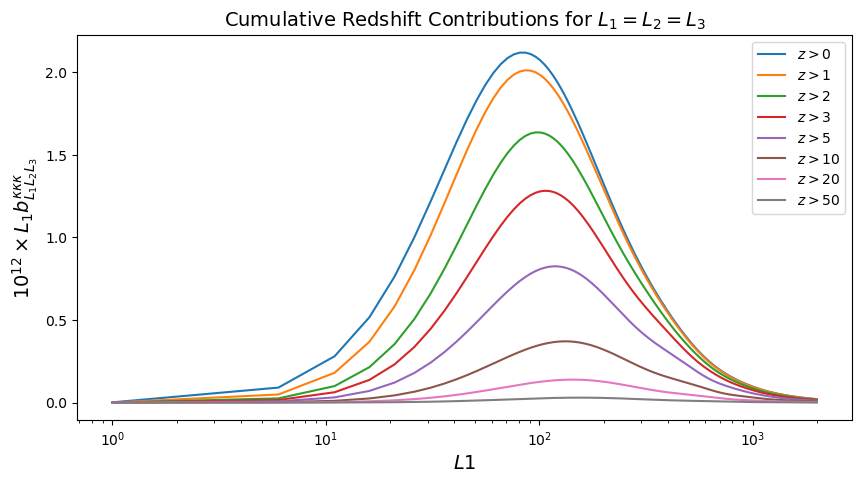

In [14]:
zmins = np.array([0,1,2,3,5,10,20,50])
L2max = 2000
dL = 5
Ls = np.arange(1, L2max, dL)
L1 = Ls
L2 = L3 = Ls
bi = Bispectra()
for zmin in zmins:
    bi_conv = bi.get_bispectrum("kkk", L1, L2, L3, zmin=zmin)
    plt.semilogx(L1, 1e12*L1*(bi_conv), label=f"$z > ${zmin}")
plt.legend()
plt.title("Cumulative Redshift Contributions for $L_1 = L_2 = L_3$", fontsize=14)
plt.ylabel(r"$10^{12}\times L_1b_{L_1L_2L_3}^{\kappa\kappa\kappa}$", fontsize=14)
plt.xlabel("$L1$", fontsize=14)
plt.show()